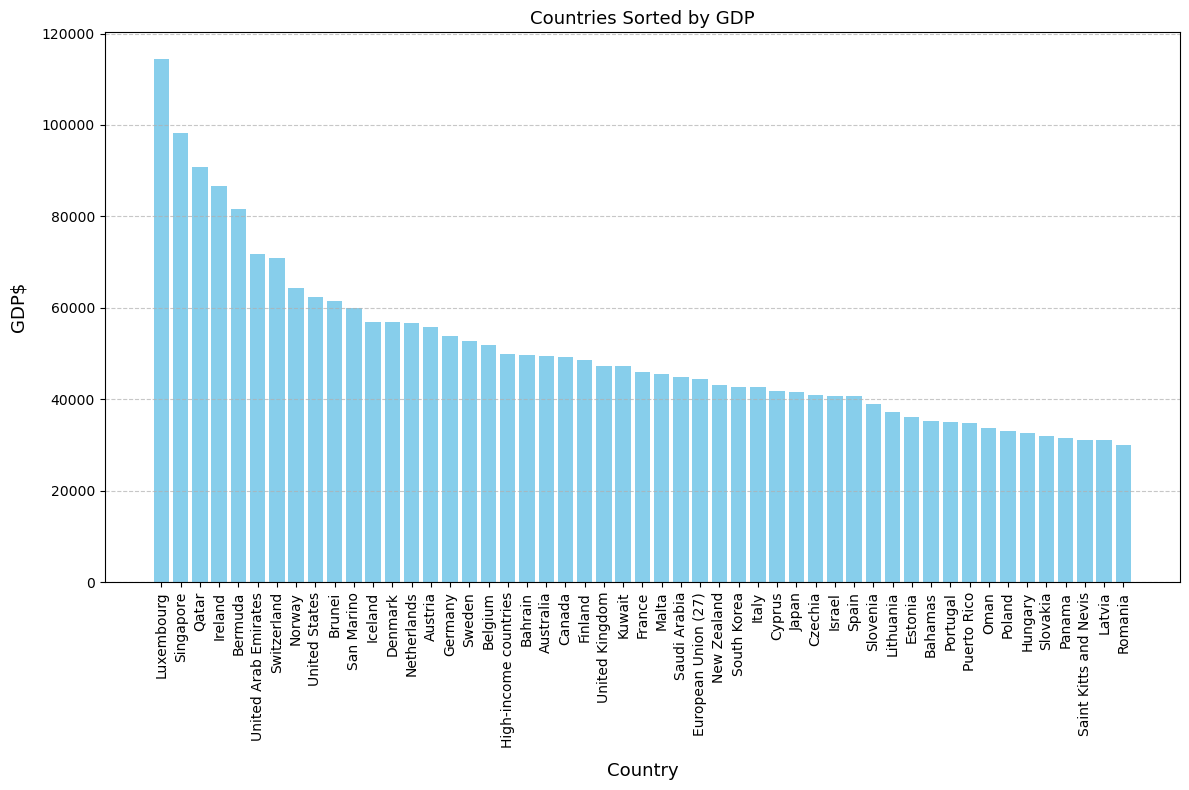

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('high_income_countries.csv')

# Sort the dataframe by GDP in descending order
df_sorted = df.sort_values(by='GDP per capita, PPP (constant 2017 international $)', ascending=False)

# Plot bar plot
plt.figure(figsize=(12, 8))
plt.bar(df_sorted['Entity'], df_sorted['GDP per capita, PPP (constant 2017 international $)'], color='skyblue')
plt.xlabel('Country', fontsize=13, labelpad=10)
plt.ylabel('GDP$', fontsize=13, labelpad=10)
plt.title('Countries Sorted by GDP', fontsize=13)
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Bar_plot')
plt.show()


In [2]:
# Calculate statistics
min_gdp_country = df.loc[df['GDP per capita, PPP (constant 2017 international $)'].idxmin()]['Entity']
max_gdp_country = df.loc[df['GDP per capita, PPP (constant 2017 international $)'].idxmax()]['Entity']

# Calculate the 25th percentile GDP
q25_gdp = df['GDP per capita, PPP (constant 2017 international $)'].quantile(0.25)

# Find the country with GDP closest to the 25th percentile
country_at_q25 = df.loc[(df['GDP per capita, PPP (constant 2017 international $)'] - q25_gdp).abs().idxmin()]['Entity']

# Calculate the 75th percentile GDP
q75_gdp = df['GDP per capita, PPP (constant 2017 international $)'].quantile(0.75)

# Find the country with GDP closest to the 75th percentile
country_at_q75 = df.loc[(df['GDP per capita, PPP (constant 2017 international $)'] - q75_gdp).abs().idxmin()]['Entity']

# Calculate the mean GDP
mean_gdp = df['GDP per capita, PPP (constant 2017 international $)'].mean()

# Find the country with GDP closest to the mean
country_at_mean_gdp = df.loc[(df['GDP per capita, PPP (constant 2017 international $)'] - mean_gdp).abs().idxmin()]['Entity']

# Print the results
print("Country with minimum GDP:", min_gdp_country)
print("Country with maximum GDP:", max_gdp_country)
print("Country with GDP at 25th percentile:", country_at_q25)
print("Country with GDP at 75th percentile:", country_at_q75)
print("Country with GDP closest to the mean GDP:", country_at_mean_gdp)


Country with minimum GDP: Romania
Country with maximum GDP: Luxembourg
Country with GDP at 25th percentile: Slovenia
Country with GDP at 75th percentile: Denmark
Country with GDP closest to the mean GDP: High-income countries


In [3]:
# Preperation of new DataFrames
# List of countries
countries = ['Romania', 'Slovenia', 'Bahrain', 'Denmark', 'Luxembourg'] 

# Load the datasets into DataFrames
df2 = pd.read_csv('cleaned_anxiety_GDP_data.csv')
source1_df = pd.read_csv('bipolar-disorder-prevalence.csv')
source2_df = pd.read_csv('eating-disorders-prevalence.csv')
source3_df = pd.read_csv('schizophrenia-prevalence.csv')

# Loop over each country
for country in countries:
    # Filter the DataFrame for the specific country
    filtered_df = df2[df2['Entity'] == country]
    
    # Merge the DataFrames based on both 'country' and 'year' columns
    merged_df = pd.merge(filtered_df, source1_df, on=['Entity', 'Year'], how='inner')
    merged1_df = pd.merge(merged_df, source2_df, on=['Entity', 'Year'], how='inner')
    merged2_df = pd.merge(merged1_df, source3_df, on=['Entity', 'Year'], how='inner')
    merged2_df['total_mental_disorder_rate'] = (merged2_df['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] +
                                    merged2_df['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'] +
                                    merged2_df['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'] +
                                    merged2_df['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'])
    
    # Save the filtered data to a new file
    file_name = f'{country}_data.csv'
    merged2_df.to_csv(file_name, index=False)


C:\Users\Niloo\AppData\Local\Temp\ipykernel_34192\1674985723.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged2_df = pd.merge(merged1_df, source3_df, on=['Entity', 'Year'], how='inner')
C:\Users\Niloo\AppData\Local\Temp\ipykernel_34192\1674985723.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged2_df = pd.merge(merged1_df, source3_df, on=['Entity', 'Year'], how='inner')
C:\Users\Niloo\AppData\Local\Temp\ipykernel_34192\1674985723.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged2_df = pd.merge(merged1_df, source3_df, on=['Entity', 'Year'], how='inner')
C:\Users\Niloo\AppData\Local\Temp\ipykernel_34192\1674985723.py:19: FutureWarning: Passi

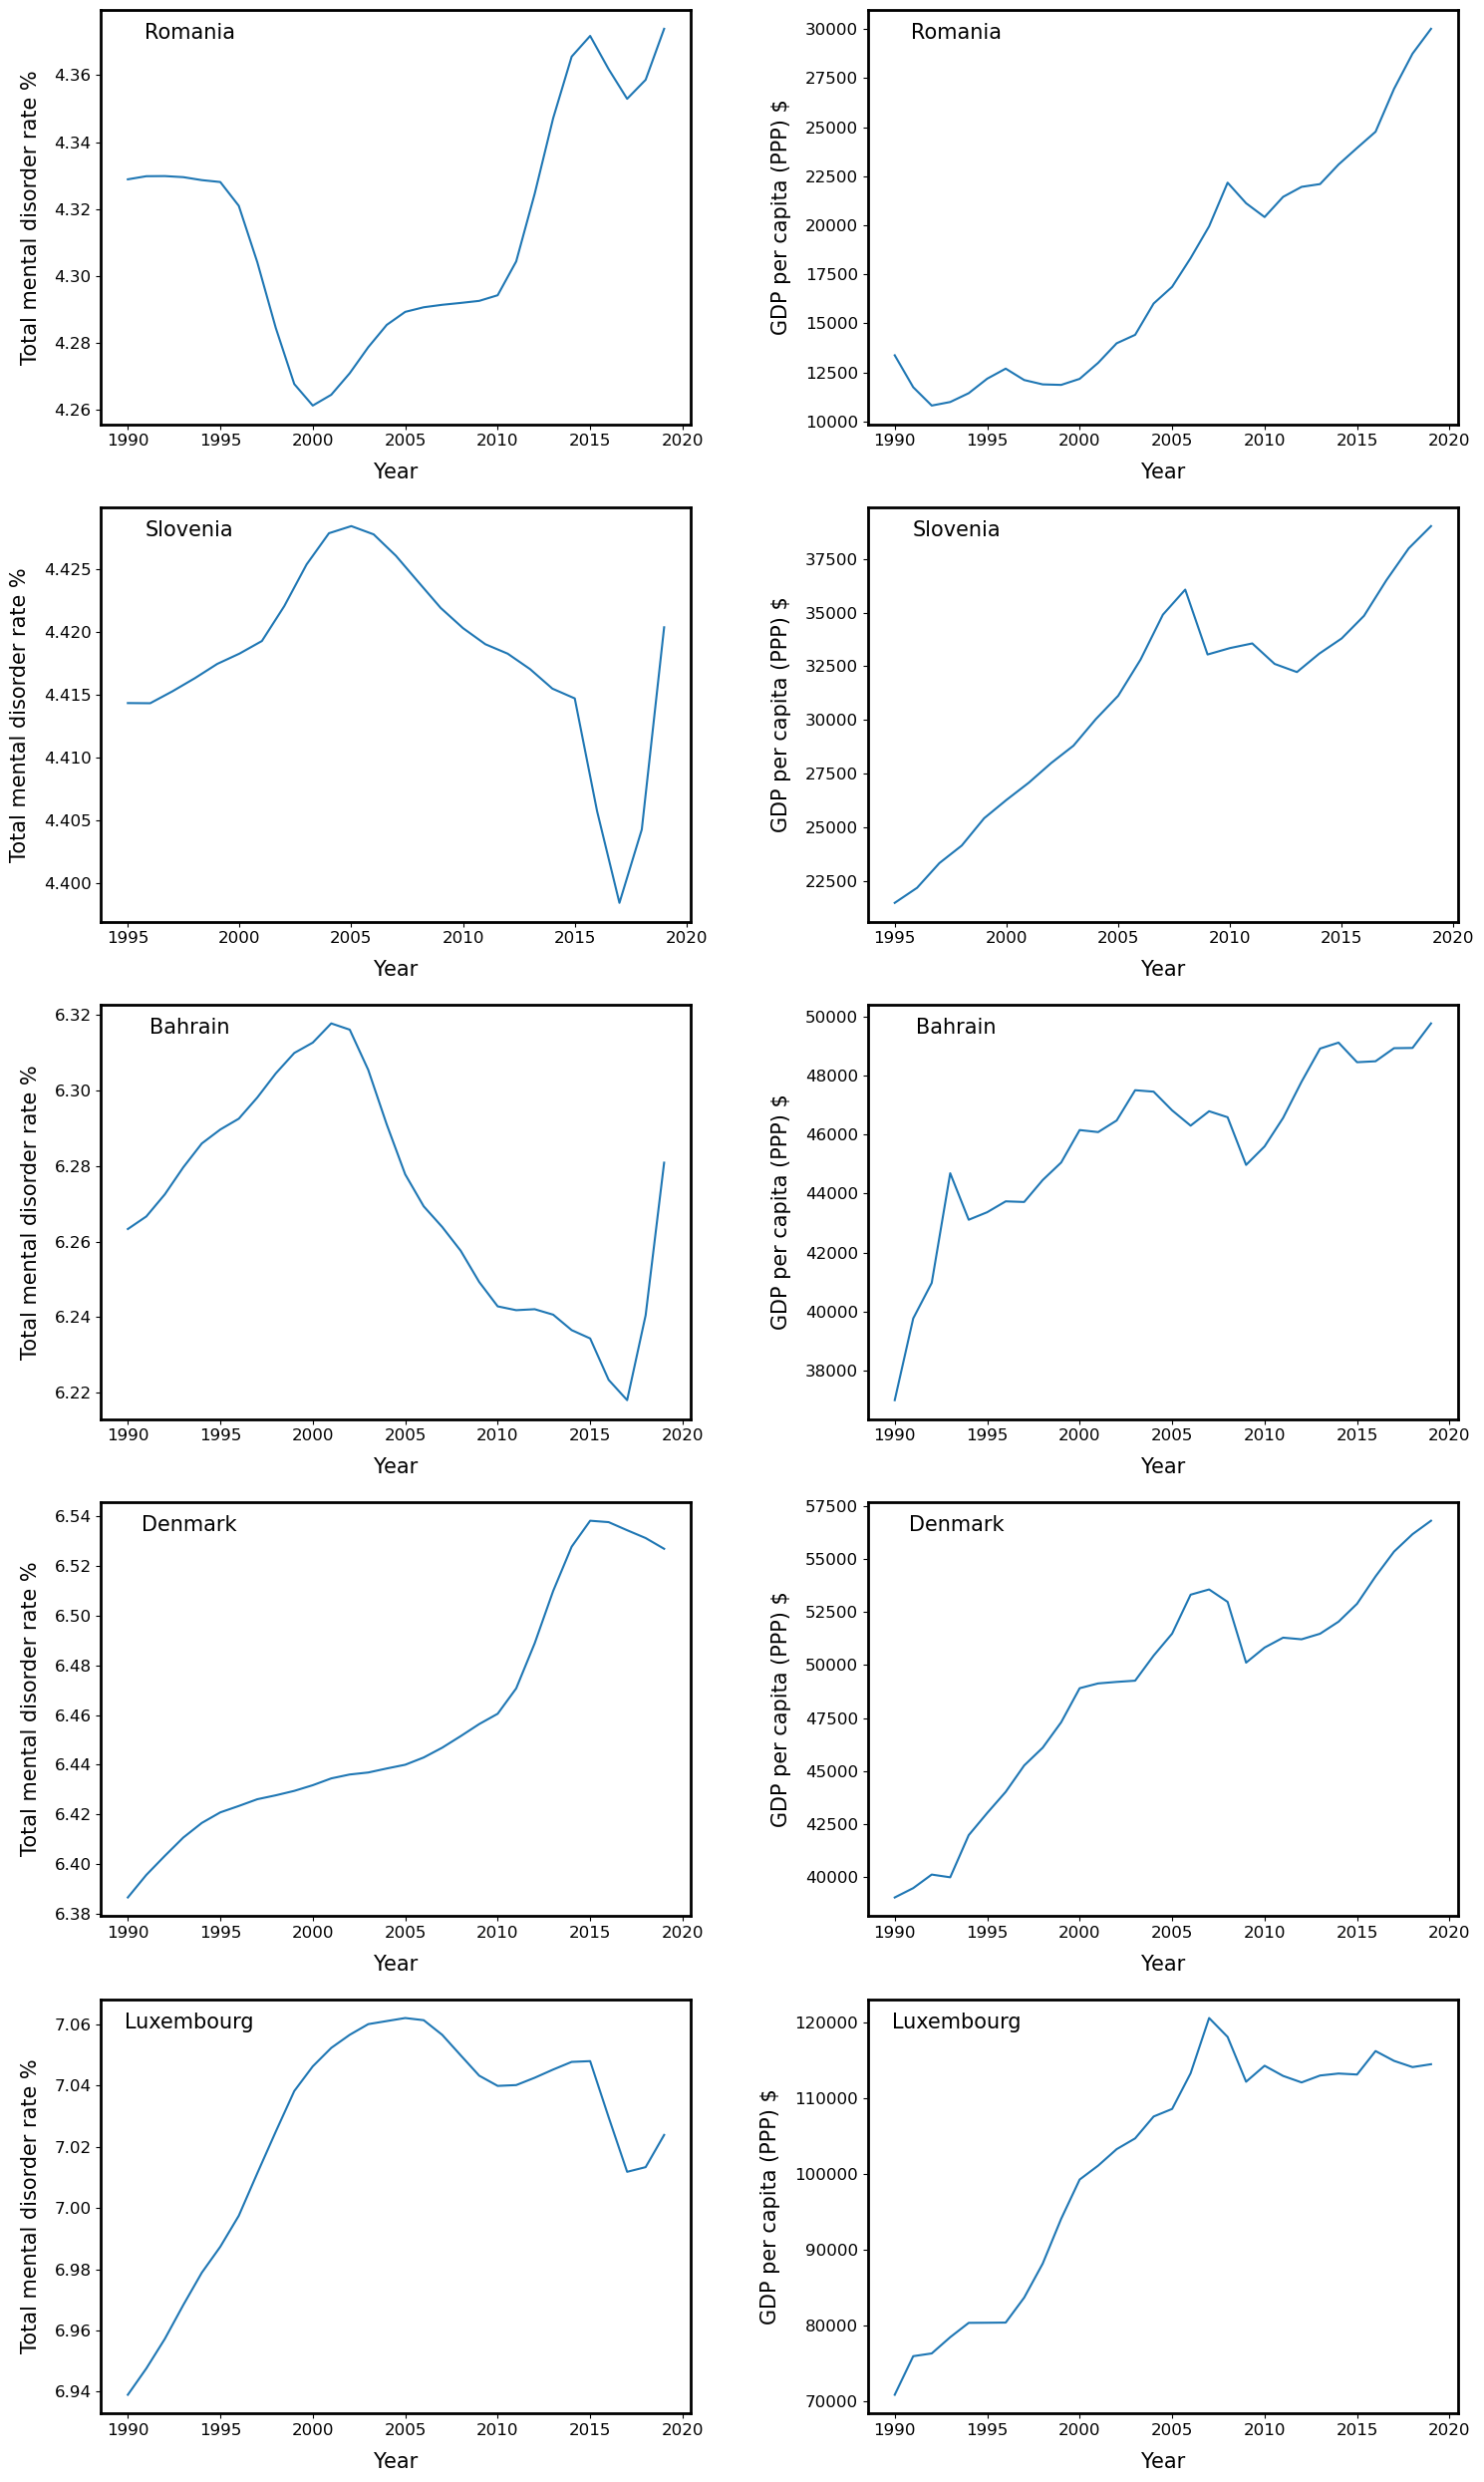

In [4]:
# Plot
# Calculate the number of rows for subplots
num_files = len(countries)
num_cols = 2 
num_rows = num_files

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Plot mental rate and GDP over time for each country
for i, country in enumerate(countries):
    file_name = f'{country}_data.csv'
    df = pd.read_csv(file_name)
    axes[i, 0].plot(df['Year'], df['total_mental_disorder_rate'], label=country)
    axes[i, 0].set_xlabel('Year', fontsize=15, labelpad=10)
    axes[i, 0].set_ylabel('Total mental disorder rate %', fontsize=15, labelpad=10)
    # Increase the font size of axis numbers
    axes[i, 0].tick_params(axis='both', which='major', labelsize=12)  # Adjust labelsize as needed
    # Add caption
    axes[i, 0].text(0.15, 0.93, country, transform=axes[i, 0].transAxes, fontsize=15, ha='center')
    # Increase the thickness of the axis tick lines
    axes[i, 0].spines['top'].set_linewidth(2)  
    axes[i, 0].spines['right'].set_linewidth(2)  
    axes[i, 0].spines['bottom'].set_linewidth(2)  
    axes[i, 0].spines['left'].set_linewidth(2)

    
    axes[i, 1].plot(df['Year'], df['GDP per capita, PPP (constant 2017 international $)'], label=country)
    axes[i, 1].set_xlabel('Year', fontsize=15, labelpad=10)
    axes[i, 1].set_ylabel('GDP per capita (PPP) $', fontsize=15, labelpad=10)
    # Increase the font size of axis numbers
    axes[i, 1].tick_params(axis='both', which='major', labelsize=12)  # Adjust labelsize as needed
    # Add caption
    axes[i, 1].text(0.15, 0.93, country, transform=axes[i, 1].transAxes, fontsize=15, ha='center')
    # Increase the thickness of the axis tick lines
    axes[i, 1].spines['top'].set_linewidth(2)  
    axes[i, 1].spines['right'].set_linewidth(2)  
    axes[i, 1].spines['bottom'].set_linewidth(2)  
    axes[i, 1].spines['left'].set_linewidth(2)

# Adjust layout to prevent overlap, save and show
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.2)    
plt.savefig('Time_series_data')
plt.show()
